(lecture05:homework)=
# Homework 5

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ This is due before the beginning of the next lecture.
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name:** Rashi
+ **Last Name:** Jain
+ **Email:** rashijain.x@gmail.com 

Again, let me set you up with some code for plotting and downloading files.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')

import requests
import os

def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

## Problem 1 - Analysis of experimental srtess-strain curves of alluminum 6061-T651

We are going to analyze the dataset collected by {cite}`AAKASH2019104085`.
They perform two types of experiments.
We are going to focus on the "uniaxial tension experiment." 
This is what it is all about:
+ They take several speciments of alluminum 6061-T651 ([a high-temperature alluminum alloy](https://en.wikipedia.org/wiki/6061_aluminium_alloy)).
+ The shape of these speciments is like this:

```{figure} https://ars.els-cdn.com/content/image/1-s2.0-S2352340919304391-gr1_lrg.jpg
---
height: 300px
name: directive-fig
---
Geometry of the uniaxial tension specimen.
```
+ They mounted the speciment (using the holes you see on the sides) on a machine that applied tension:

```{figure} https://ars.els-cdn.com/content/image/1-s2.0-S2352340919304391-gr5_lrg.jpg
---
height: 300px
name: directive-fig2
---
The mounted specimen.
```
+ They controlled the temperature of the specimen.
+ They applied tension gradually until the speciment broke, recorging at each step the strain (% change in length) and the stress (force per cross section area in MPa - megaPascal).

I suggest that you skim through the paper if you want to understand more about the details of the experiment.
Measuring the strains and stresses is not as straightforward as it sounds...

Our goal is to download the data, and for a fixed temperature, create a model for the stress-strain relation.
We are going to do some of the low level stuff.
But, I am going to guide you through this.

+ First, download the complete zipped data from [here](https://data.mendeley.com/datasets/rd6jm9tyb6/2) and unzip it in the directory of your Jupyter notebook.
You have two options. Either do it mannually as we did in {ref}`lecture03:homework` or run the code segment below to do it from this Jupyter notebook:

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')

import requests
import os

def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)

# Sometimes I've had to copy and paste previous running code into the new code line to execute it. 
url = 'https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/rd6jm9tyb6-2.zip'
download(url)
!unzip -o rd6jm9tyb6-2.zip
!unzip -o stress-strain-curves-of-aluminum-6061-t651-from-9-lots-at-6-temperatures-under-uniaxial-and-plain-strain-tension.zip

Archive:  rd6jm9tyb6-2.zip
  inflating: stress-strain-curves-of-aluminum-6061-t651-from-9-lots-at-6-temperatures-under-uniaxial-and-plain-strain-tension.zip  
Archive:  stress-strain-curves-of-aluminum-6061-t651-from-9-lots-at-6-temperatures-under-uniaxial-and-plain-strain-tension.zip
  inflating: P_020_G_2_022_195_24.csv  
  inflating: T_250_C_1_131_109_18.csv  
  inflating: P_250_F_3_143_187_09.csv  
  inflating: P_200_G_3_116_171_07.csv  
  inflating: P_250_G_2_146_176_09.csv  
  inflating: P_250_I_1_153_183_08.csv  
  inflating: P_300_I_2_185_163_17.csv  
  inflating: T_020_A_1_001_022_03.csv  
  inflating: T_020_E_1_013_071_03.csv  
  inflating: T_020_C_2_008_046_02.csv  
  inflating: T_020_B_2_005_061_02.csv  
  inflating: T_150_E_1_075_116_09.csv  
  inflating: T_150_C_1_069_107_16.csv  
  inflating: P_020_G_1_021_197_16.csv  
  inflating: P_150_H_1_087_166_01.csv  
  inflating: P_200_I_2_123_169_06.csv  
  inflating: P_250_G_3_147_179_10.csv  
  inflating: P_200_I_1_122_181_07.

+ Now read the data description [here](https://data.mendeley.com/datasets/rd6jm9tyb6/2) very carefully and find a filename that contains data from a uniaxial tension test of 200 degrees C. There multiple files that fit this description. Just pick one of them.

In [24]:
filename = 'T_200_A_1_094_041_14.csv'
print('The file I picked is: ', filename)


The file I picked is:  T_200_A_1_094_041_14.csv


+ Load the file in a dataframe and print it.

In [30]:
import pandas as pd
df = pd.read_csv('T_200_A_1_094_041_14.csv')
print(df)

       Strain  Stress_MPa
0    0.000070   -0.950199
1    0.000044    0.160190
2    0.000030    1.854753
3    0.000023    3.719668
4    0.000017    6.722914
..        ...         ...
395  0.198670   27.497394
396  0.198973   26.058133
397  0.199312   24.618516
398  0.199640   23.108119
399  0.199641    0.000000

[400 rows x 2 columns]


+ Plot the stress as a function of the strain. Hint: Please label your axes properly.

Text(0, 0.5, 'Stress (MPa)')

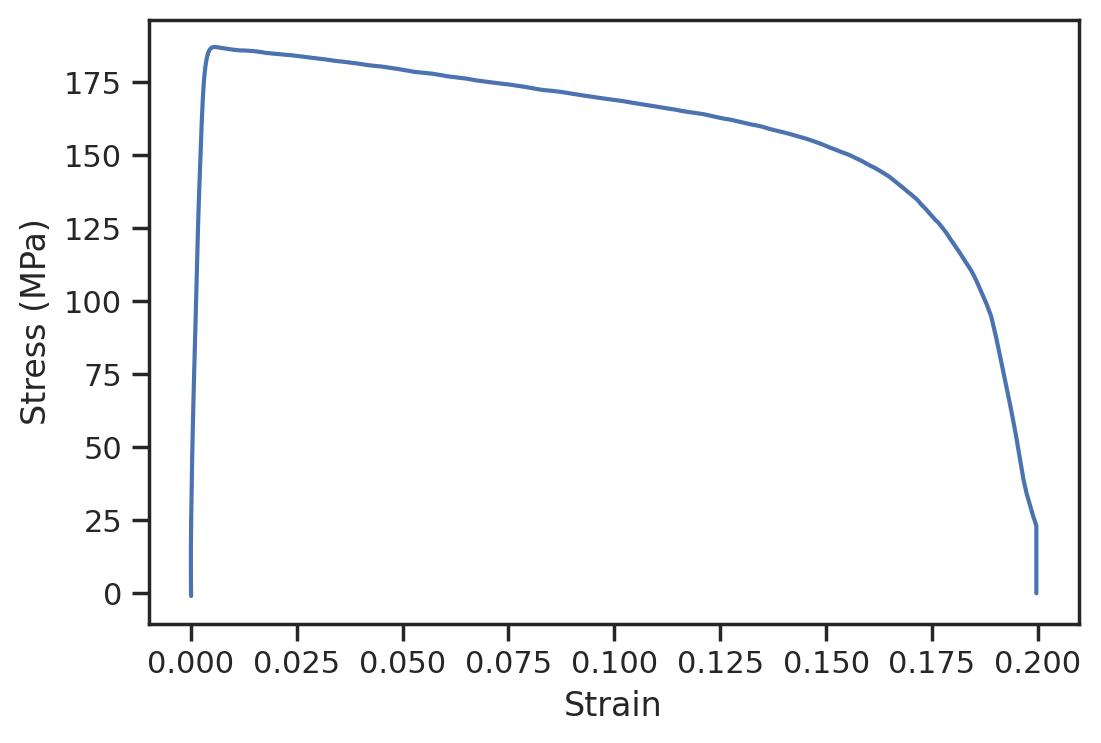

In [38]:
fig, ax = plt.subplots() 
ax.plot(df['Strain'], df['Stress_MPa'])
ax.set_xlabel('Strain')
ax.set_ylabel('Stress (MPa)');

+ The [ultimate tensile strength](https://en.wikipedia.org/wiki/Ultimate_tensile_strength) (or just "the strength") of a material is the maximum stress that develops under tension before the material breaks. What is the strength of this alluminum alloy? Please, provide your answer below using the `print()` function with a precision of 2 decimal points. How does your answer compare with the strength range for allumunum alloys reported in [wikipedia](https://en.wikipedia.org/wiki/6061_aluminium_alloy)?

In [42]:
ultimate_tensile_strength = max(df['Stress_MPa'])
print('The ultimate tensile strength of this aluminimum alloy is {0:1.2f} MPa'.format(ultimate_tensile_strength))

The ultimate tensile strength of this aluminimum alloy is 187.06 MPa


+ Let's zoom in to low strains. Plot the first 200 observations points of the stress-strain curve. 

Text(0, 0.5, 'Stress (MPa)')

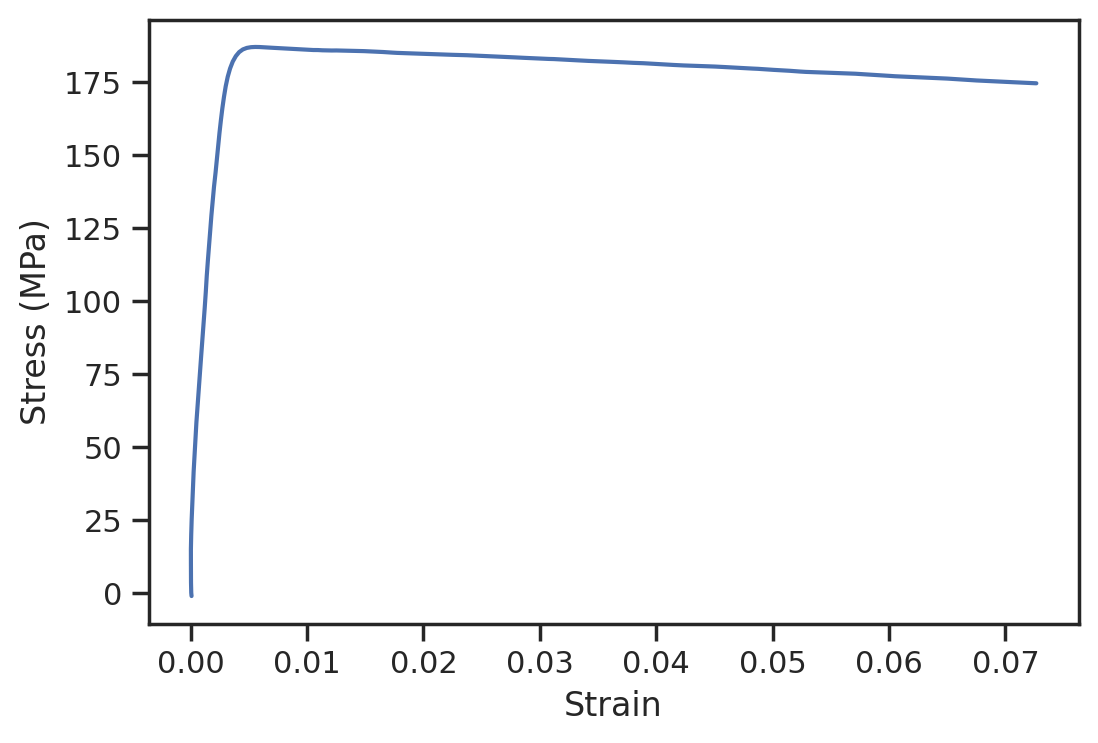

In [45]:
df_low_strains = df.head(200)
df_low_strains

fig, ax = plt.subplots() 
ax.plot(df_low_strains['Strain'], df_low_strains['Stress_MPa'])
ax.set_xlabel('Strain')
ax.set_ylabel('Stress (MPa)');

+ Observe that the experimental data are behaving strangely at very small strains. As a matter of fact, we are getting a few negative strains at the beginning.
Let's throw these observartions away. Start by finding the index $i$ for which `df['Strain'][i]` becomes positive from the first time. You can do this by a visual inspection of `df['Strain'][:30]`.

In [53]:
df['Strain'][:30]
print('For the filename chosen, there are no initial negative strains')
df['Strain'][:30]

For the filename chosen, there are no initial negative strains


0     0.000070
1     0.000044
2     0.000030
3     0.000023
4     0.000017
5     0.000016
6     0.000014
7     0.000041
8     0.000081
9     0.000134
10    0.000186
11    0.000249
12    0.000326
13    0.000406
14    0.000487
15    0.000587
16    0.000678
17    0.000782
18    0.000892
19    0.000998
20    0.001105
21    0.001202
22    0.001294
23    0.001376
24    0.001474
25    0.001582
26    0.001678
27    0.001775
28    0.001890
29    0.002000
Name: Strain, dtype: float64

+ Make a new dataframe, call it `clean_df` where you have thrown away the initial data. Then plot the first 200 observations of `clean_df`.

In [69]:
# If I were to have negative strains up until i = 15, I would use: 

# clean_df = df[i:]
# clean_df

clean_df = df

# When attempting stress-strain plot of a linear data though, there is some non-linear behavior at the bottom. Therefore, I am going to clean up the data and remove the non-linear behavior. 

clean_df = df[7:]

+ Observe that initially the stress-strain relation is linear. This is the so-called *elastic regime*.
If you deform the material within this regime, it will return to its undeformed state without any permanent deformation effects.
If you deform the material beyond the elastic regime, then you start having what we call *plasticity*.
We are now going to focus exclusively to the linear regime.
Find an index $j$ so that `clean_df[:j]` is fully within the linear regime.
Make a new dataframe, say `linear_df` containing only these data.
You should probably pick $j$ by visual inspection.
And it is not important to pick the maximum $j$ with this property.
Just find one.

Text(0, 0.5, 'Stress (MPa)')

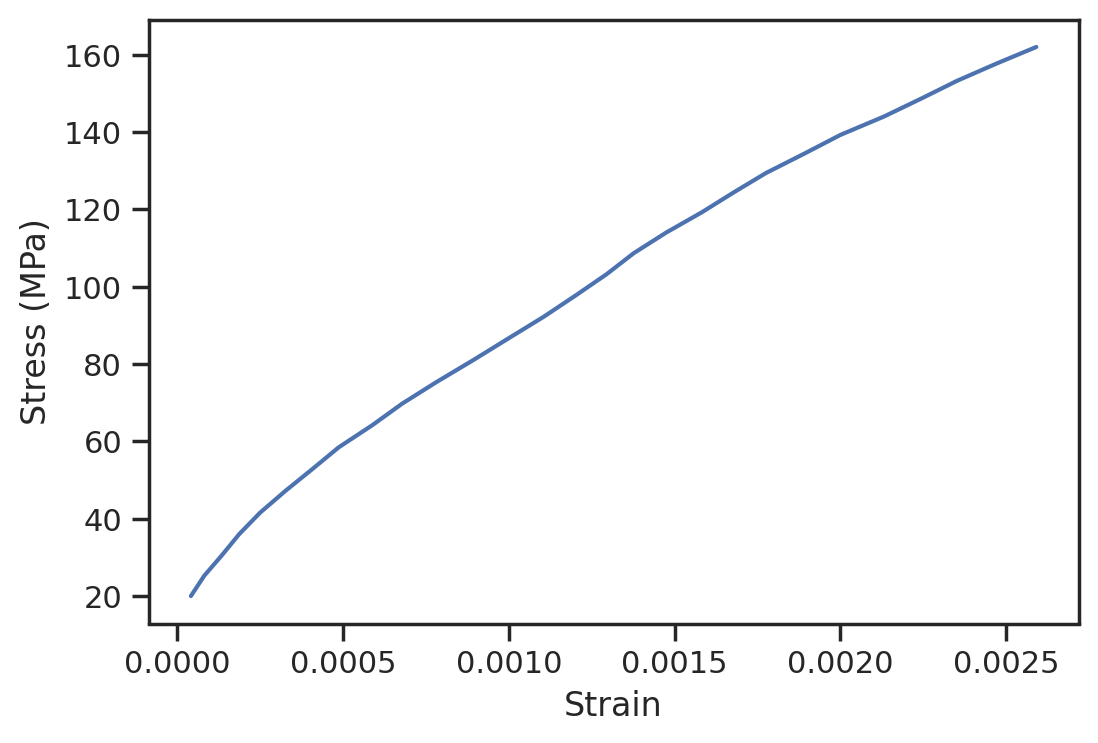

In [77]:
# 35 - the limit for linear behavior 
linear_df = clean_df[0:28]

fig, ax = plt.subplots() 
ax.plot(linear_df['Strain'], linear_df['Stress_MPa'])
ax.set_xlabel('Strain')
ax.set_ylabel('Stress (MPa)');


+ In the elastic regime, the stress $\sigma$ is a linear function of the strain $\epsilon$:

$$
\sigma = E\epsilon.
$$

The constant $E$ is called Young's modulus and it has units of GPa (GigaPascal).
Make a function `sigma(epsilon, E)` that calculates the stress given the strain for any Young's modulus. Hint: Properly document the docstring of your function.

In [78]:
def sigma(epsilon, E):
    """
        The function sigma calculates the stress at a 
        given strain value, epsilon, and a given Young's 
        Modulus E. 

        epsilon - strain values 
        E - Young's Modulus. 
    """
    return epsilon*E

In [80]:
# Try your function here:
sigma(linear_df['Strain'], 68)

7     0.002756
8     0.005509
9     0.009110
10    0.012648
11    0.016963
12    0.022137
13    0.027637
14    0.033094
15    0.039934
16    0.046111
17    0.053175
18    0.060634
19    0.067871
20    0.075147
21    0.081725
22    0.088019
23    0.093588
24    0.100234
25    0.107553
26    0.114096
27    0.120723
28    0.128522
29    0.135979
30    0.144981
31    0.152726
32    0.159997
33    0.168032
34    0.176193
Name: Strain, dtype: float64

+ If you pay close attention to the data in `linear_df` they do not cross zero.
This is due to a systematic bias in the experiment.
However, this bias is not important for calibrating Young's modulus $E$.
Only the slope of the curve is important for finding $E$.
So, let's make yet another dataframe (I promise you this is the last one) called `clean_linear_df` which removes this systematic bias.
The dataframe `clean_linear_df` should contain the same data as `linear_df` but
    + The strains should all shifted by the minimum strain in `linear_df`. In other words, subtract from the strains in `clean_linear_df` the smallest strain in `linear_df`, i.e., subtract `linear_df['Strain'].min()`.
    + The stresses should all be shifted by the minimum stress in `linear_df`.

In [100]:
linear_df

clean_linear_df = linear_df - linear_df.min()
clean_linear_df

# Verification 
# strain = linear_df['Strain'] - linear_df['Strain'].min()
# strain

# stress = linear_df['Stress_MPa'] - linear_df['Stress_MPa'].min()
# stress

,Strain,Stress_MPa
7,0.000000,0.000000
8,0.000040,5.269612
9,0.000093,10.529435
10,0.000145,15.970931
11,0.000209,21.561776
12,0.000285,27.165121
13,0.000366,32.779482
14,0.000446,38.446120
15,0.000547,44.125170
16,0.000638,49.734150


+ Use visual inspection to find a value for the Young's modulus that matches the data in `clean_linear_df`.
Hints: Remember that the stress $\sigma$ is in MPa so you will have to change the units correctly if you $E$ is expressed in GPa.

The Youngs Modulus found via from visual inspection is  53.33 GPa


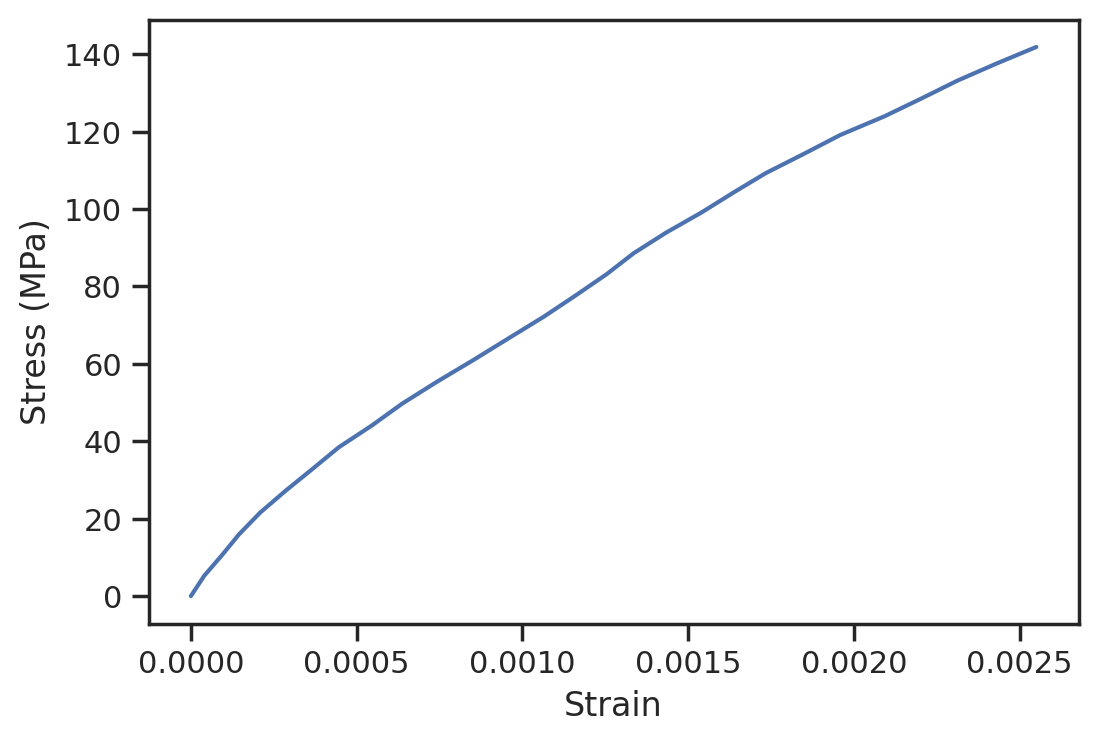

In [117]:
fig, ax = plt.subplots()
ax.plot(clean_linear_df['Strain'], clean_linear_df['Stress_MPa'])
ax.set_xlabel('Strain')
ax.set_ylabel('Stress (MPa)');

E = 53.33 
print('The Young''s Modulus found via from visual inspection is ', E, 'GPa')

+ How does what you found compare to the [wikipedia](https://en.wikipedia.org/wiki/6061_aluminium_alloy) reported Young's modulus for this material? Why do you think your is lower/higher? You may want to repeat the analysis above for another experiment with lower temperature (say at room temperature).

In [119]:
print('Calculated Young''s Modulus is much lower than the reported value of 68 GPa.')

Calculated Youngs Modulus is much lower than the reported value of 68 GPa.
